<a href="https://colab.research.google.com/github/T-Schwab/QM2/blob/main/GDAT_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd

In [3]:
# Read the shapefile
gdf = gpd.read_file("GDAT_v1_catchments.shp")

# Print the first few rows of the GeoDataFrame
print(gdf.head())

   Feature_ID     Dam_Name Alt_Name Reservoir Alt_Reserv         River  \
0           1  Beni Bahdel     None      None       None         Tafna   
1           2  Bou Hanifia     None      None       None     El Hammam   
2           3     Bakhadda     None      None       None          Mina   
3           4    Boughzoul     None      None       None  Nahar Ouasel   
4           5     Ain Zada     None      None       None    Bou Sellam   

  Alt_River           Main_basin            Sub_basin Continent  ...  \
0      None  Mediterranean Coast  Algerian west coast    Africa  ...   
1      None  Mediterranean Coast  Algerian west coast    Africa  ...   
2      None  Mediterranean Coast               Chelif    Africa  ...   
3      None  Mediterranean Coast               Chelif    Africa  ...   
4      None           Bou Sellam  Algerian east coast    Africa  ...   

  Alt_Capac           Source Comment Editor  Main_P_Map intp_dist  \
0      None  AQUASTAT, GRAND    None    Sid  Irrigati

<Axes: >

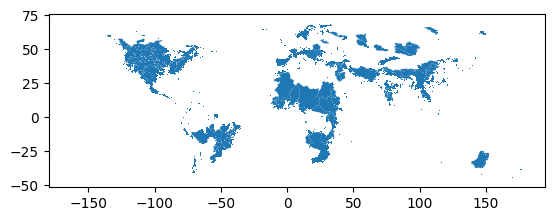

In [4]:
gdf.plot()

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(gdf)

# Filter for only Africa
df_africa = df[df['Continent'] == 'Africa']

# Verify the filtered data
print(df_africa)


      Feature_ID                         Dam_Name Alt_Name Reservoir  \
0              1                      Beni Bahdel     None      None   
1              2                      Bou Hanifia     None      None   
2              3                         Bakhadda     None      None   
3              4                        Boughzoul     None      None   
4              5                         Ain Zada     None      None   
...          ...                              ...      ...       ...   
5773        6239  Henry Hallam (or Prince Edward)     None      None   
5774        6240                           Rufaro     None      None   
5775        6241                           Kudzwe     None      None   
5776        6242                         Blockley     None      None   
5777        6243                         Bumururu     None      None   

     Alt_Reserv         River Alt_River           Main_basin  \
0          None         Tafna      None  Mediterranean Coast   
1      

In [7]:
pip install geopandas matplotlib shapely cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 88.0 MB/s eta 0:00:00


In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt

# For demonstration, I'll assume df is the DataFrame you've shared.
df_coords = df_africa  # Replace 'your_data' with the actual variable

# Step 2: Extract the 'Correct_Co' column and convert it to geometries
df_coords['geometry'] = df_coords['Correct_Co'].apply(lambda x: wkt.loads(x))

# Convert the dataframe to a GeoDataFrame
gdf_coords = gpd.GeoDataFrame(df_coords, geometry='geometry')

# Now filter out the relevant columns
gdf_coords = gdf_coords[['Dam_Name', 'geometry']]

<ipython-input-8-79dec0c9fde5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coords['geometry'] = df_coords['Correct_Co'].apply(lambda x: wkt.loads(x))


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


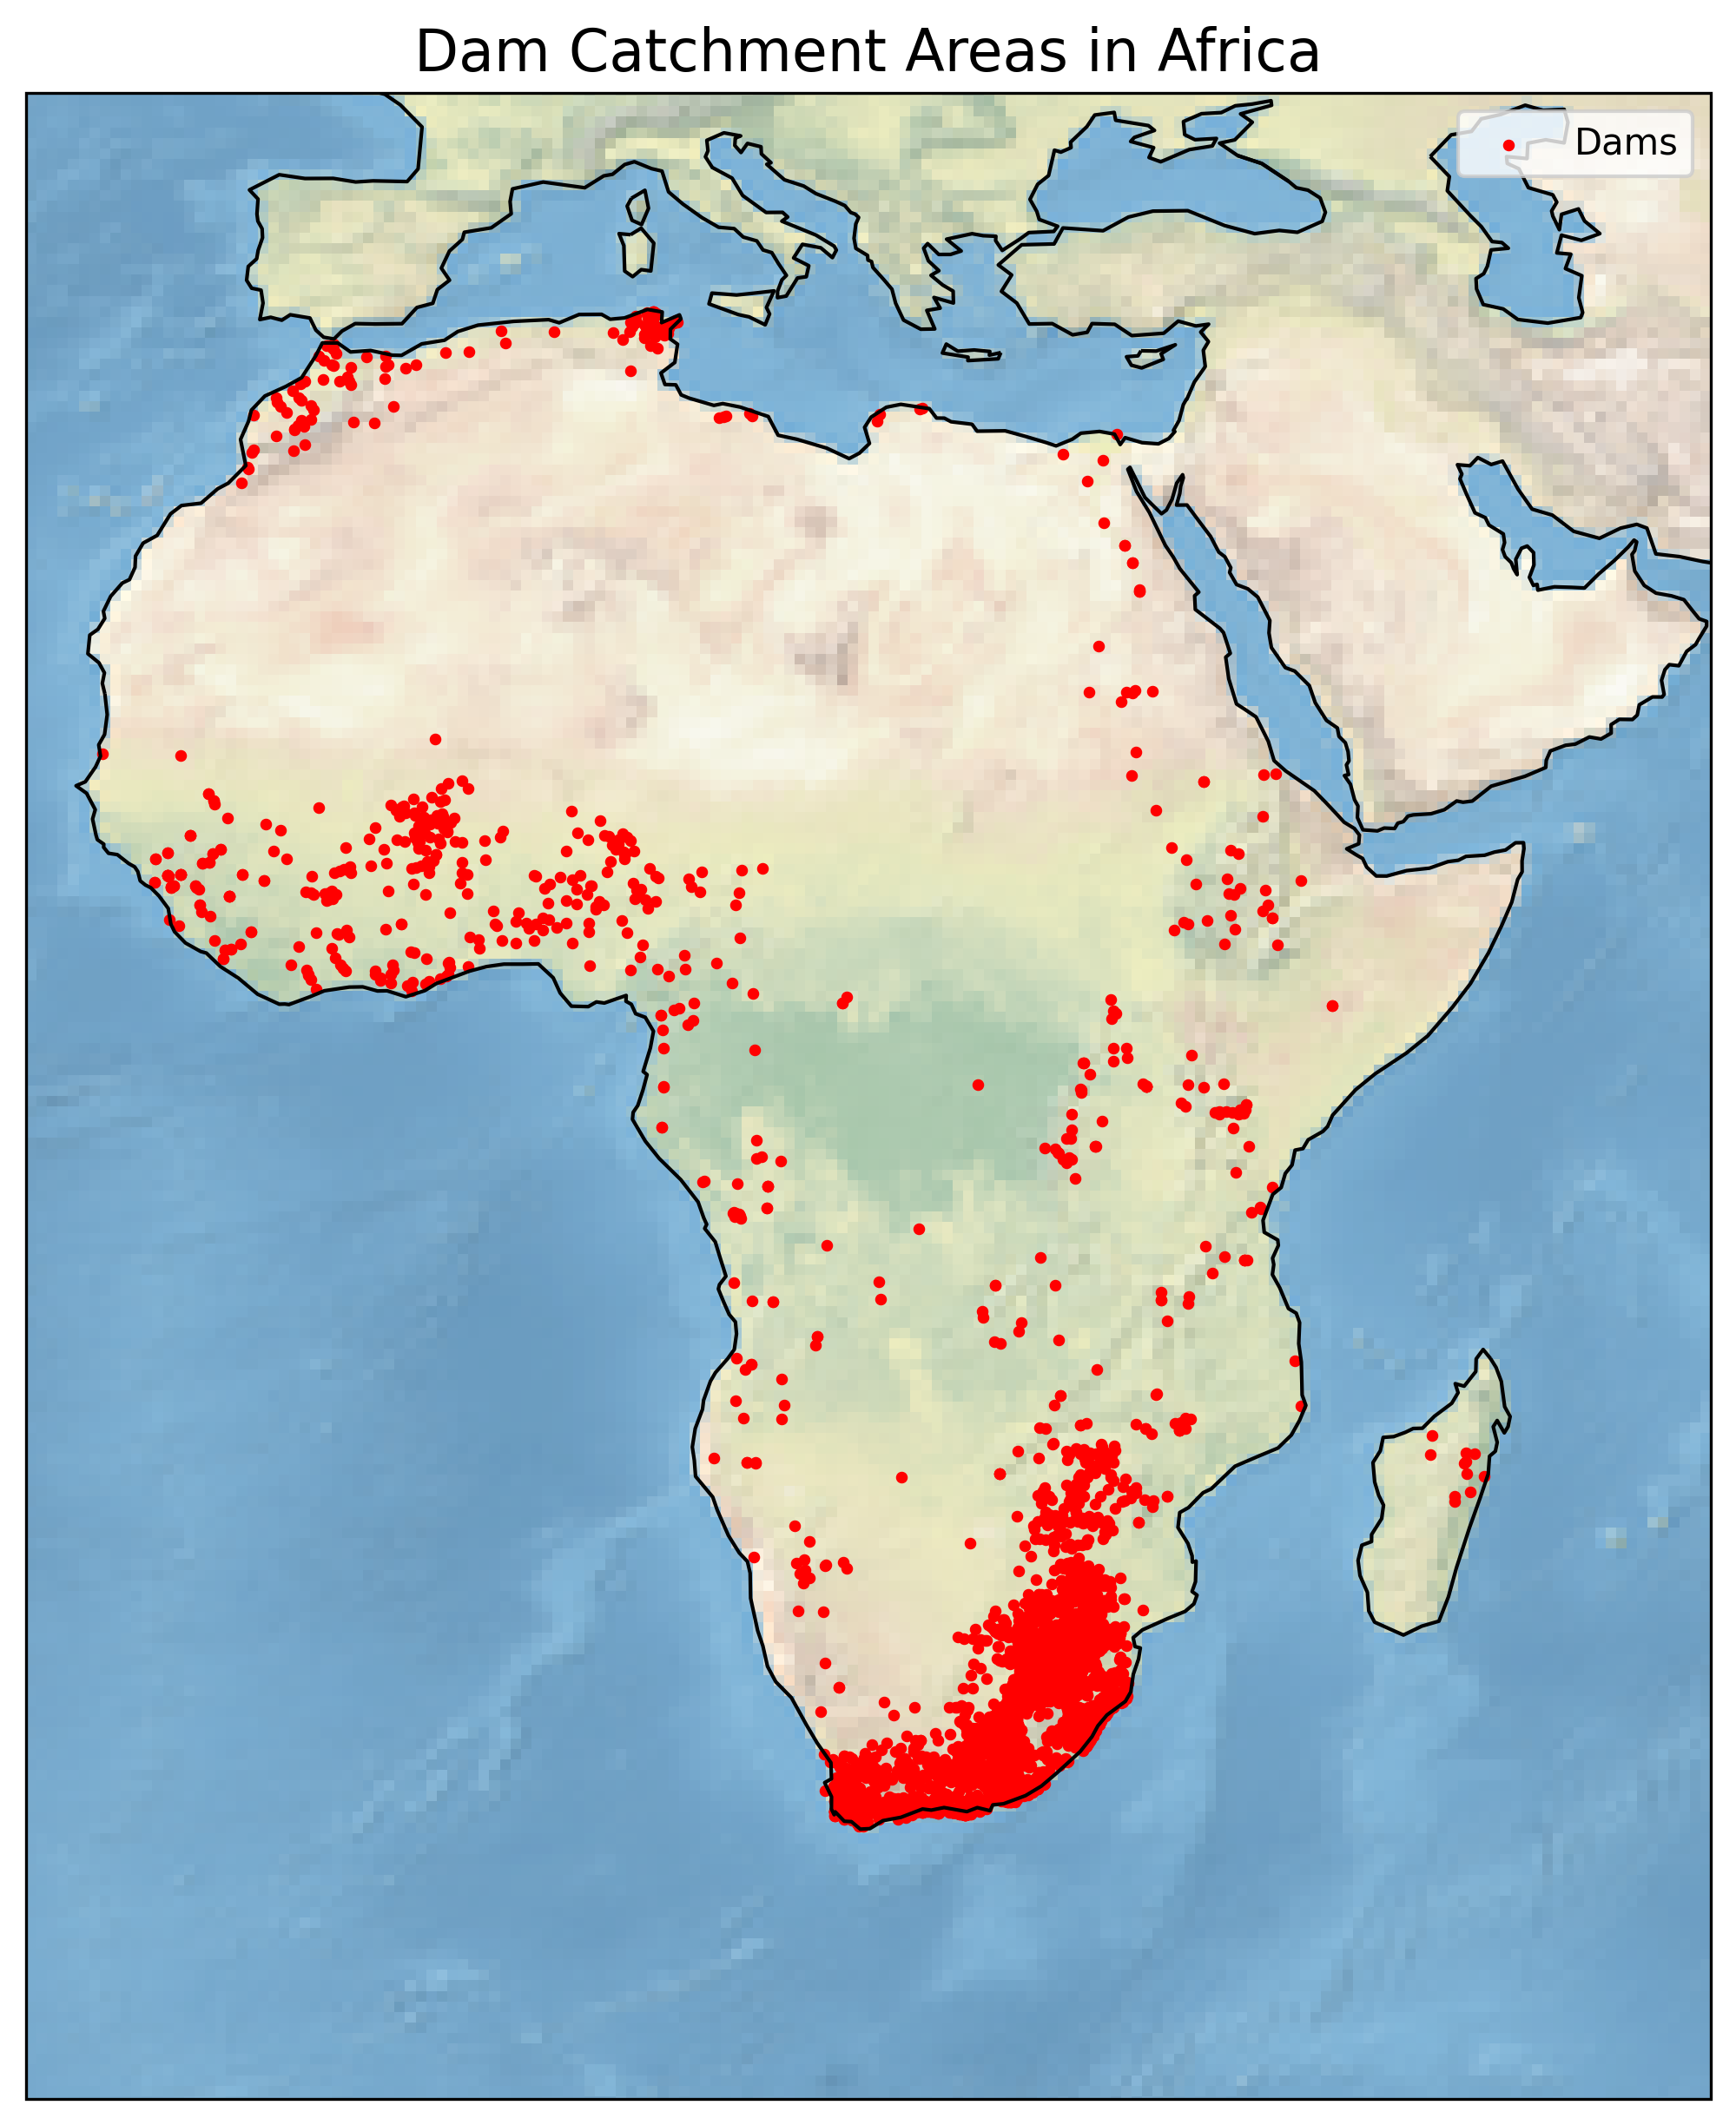

In [9]:
import cartopy.crs as ccrs

# Set up the map projection (for Africa, a simple PlateCarree projection works)
fig, ax = plt.subplots(figsize=(10, 10), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})

# Add a basic map of Africa using Cartopy
ax.set_extent([-20, 60, -40, 40])  # Bounding box for Africa (lon, lat)
ax.stock_img()  # Adds a basic image of the world
ax.coastlines()  # Add coastlines for context

# Plot the dam points using GeoPandas
gdf_coords.plot(ax=ax, marker='o', color='red', markersize=5, label="Dams")

# Add a title
ax.set_title("Dam Catchment Areas in Africa", fontsize=16)

# Optionally, add a legend
plt.legend()

# Show the plot
plt.show()

<ipython-input-10-b3d876652da3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa['geometry'] = df_africa['Correct_Co'].apply(lambda x: wkt.loads(x))


   Feature_ID     Dam_Name Alt_Name Reservoir Alt_Reserv         River  \
0           1  Beni Bahdel     None      None       None         Tafna   
1           2  Bou Hanifia     None      None       None     El Hammam   
2           3     Bakhadda     None      None       None          Mina   
3           4    Boughzoul     None      None       None  Nahar Ouasel   
4           5     Ain Zada     None      None       None    Bou Sellam   

  Alt_River           Main_basin            Sub_basin Continent  ...  \
0      None  Mediterranean Coast  Algerian west coast    Africa  ...   
1      None  Mediterranean Coast  Algerian west coast    Africa  ...   
2      None  Mediterranean Coast               Chelif    Africa  ...   
3      None  Mediterranean Coast               Chelif    Africa  ...   
4      None           Bou Sellam  Algerian east coast    Africa  ...   

  Alt_Capac           Source Comment Editor  Main_P_Map intp_dist  \
0      None  AQUASTAT, GRAND    None    Sid  Irrigati

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
<ipython-input-10-b3d876652da3>:36: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right", fontsize=10)


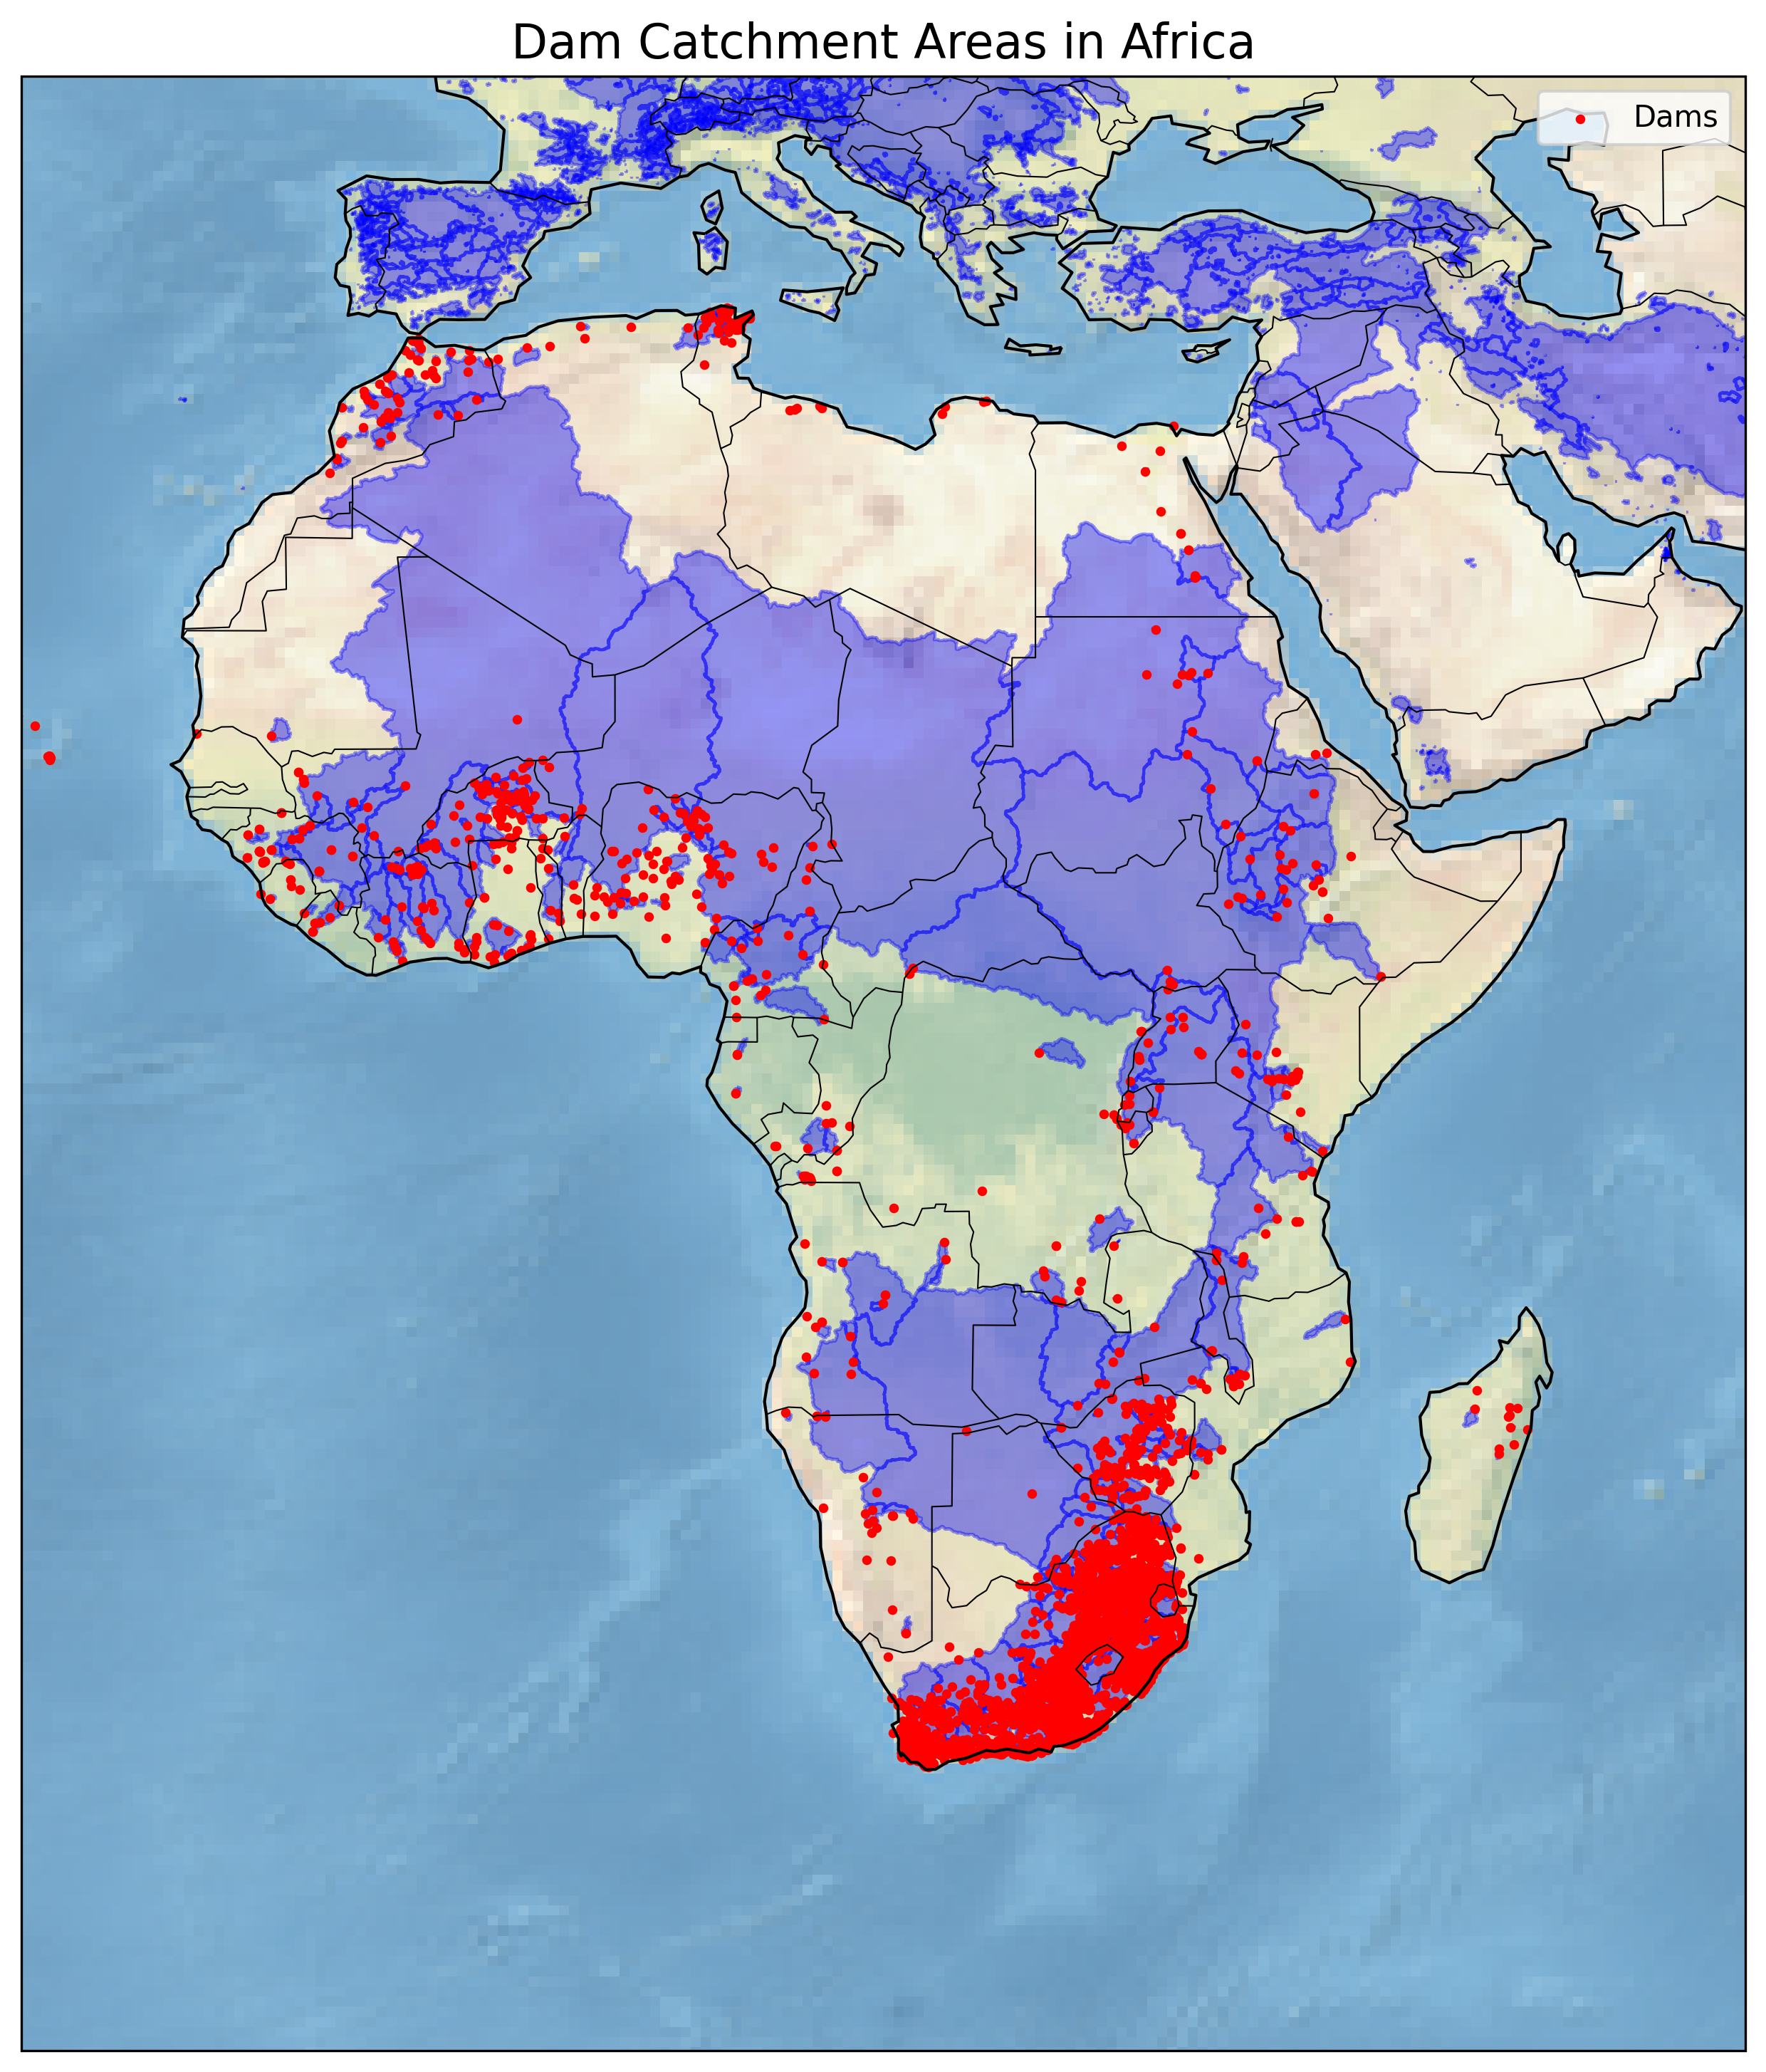

In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely import wkt

# Step 1: Load the dam data and filter for Africa
df_africa = df[df['Continent'] == 'Africa']
df_africa['geometry'] = df_africa['Correct_Co'].apply(lambda x: wkt.loads(x))
gdf_coords = gpd.GeoDataFrame(df_africa, geometry='geometry')

# Step 2: Load the catchment shapefile
gdf_catchments = gpd.read_file("GDAT_v1_catchments.shp")

# Print the first few rows of the catchments GeoDataFrame
print(gdf_catchments.head())

# Step 3: Set up the map with Cartopy
fig, ax = plt.subplots(figsize=(12, 12), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-25, 60, -40, 40])  # Full extent of Africa

# Add map features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)  # Country borders
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  # Coastlines
ax.stock_img()  # Add a simple world image as the background

# Step 4: Plot the catchment areas
gdf_catchments.plot(ax=ax, facecolor='blue', alpha=0.4, edgecolor='blue', label="Catchment Areas")

# Step 5: Plot the dam locations
gdf_coords.plot(ax=ax, marker='o', color='red', markersize=5, label="Dams")

# Step 6: Add title and legend
ax.set_title("Dam Catchment Areas in Africa", fontsize=16)
plt.legend(loc="upper right", fontsize=10)

# Show the plot
plt.show()


<ipython-input-11-ca5c6c06125f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa['geometry'] = df_africa['Correct_Co'].apply(lambda x: wkt.loads(x))
<ipython-input-11-ca5c6c06125f>:32: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right", fontsize=10)


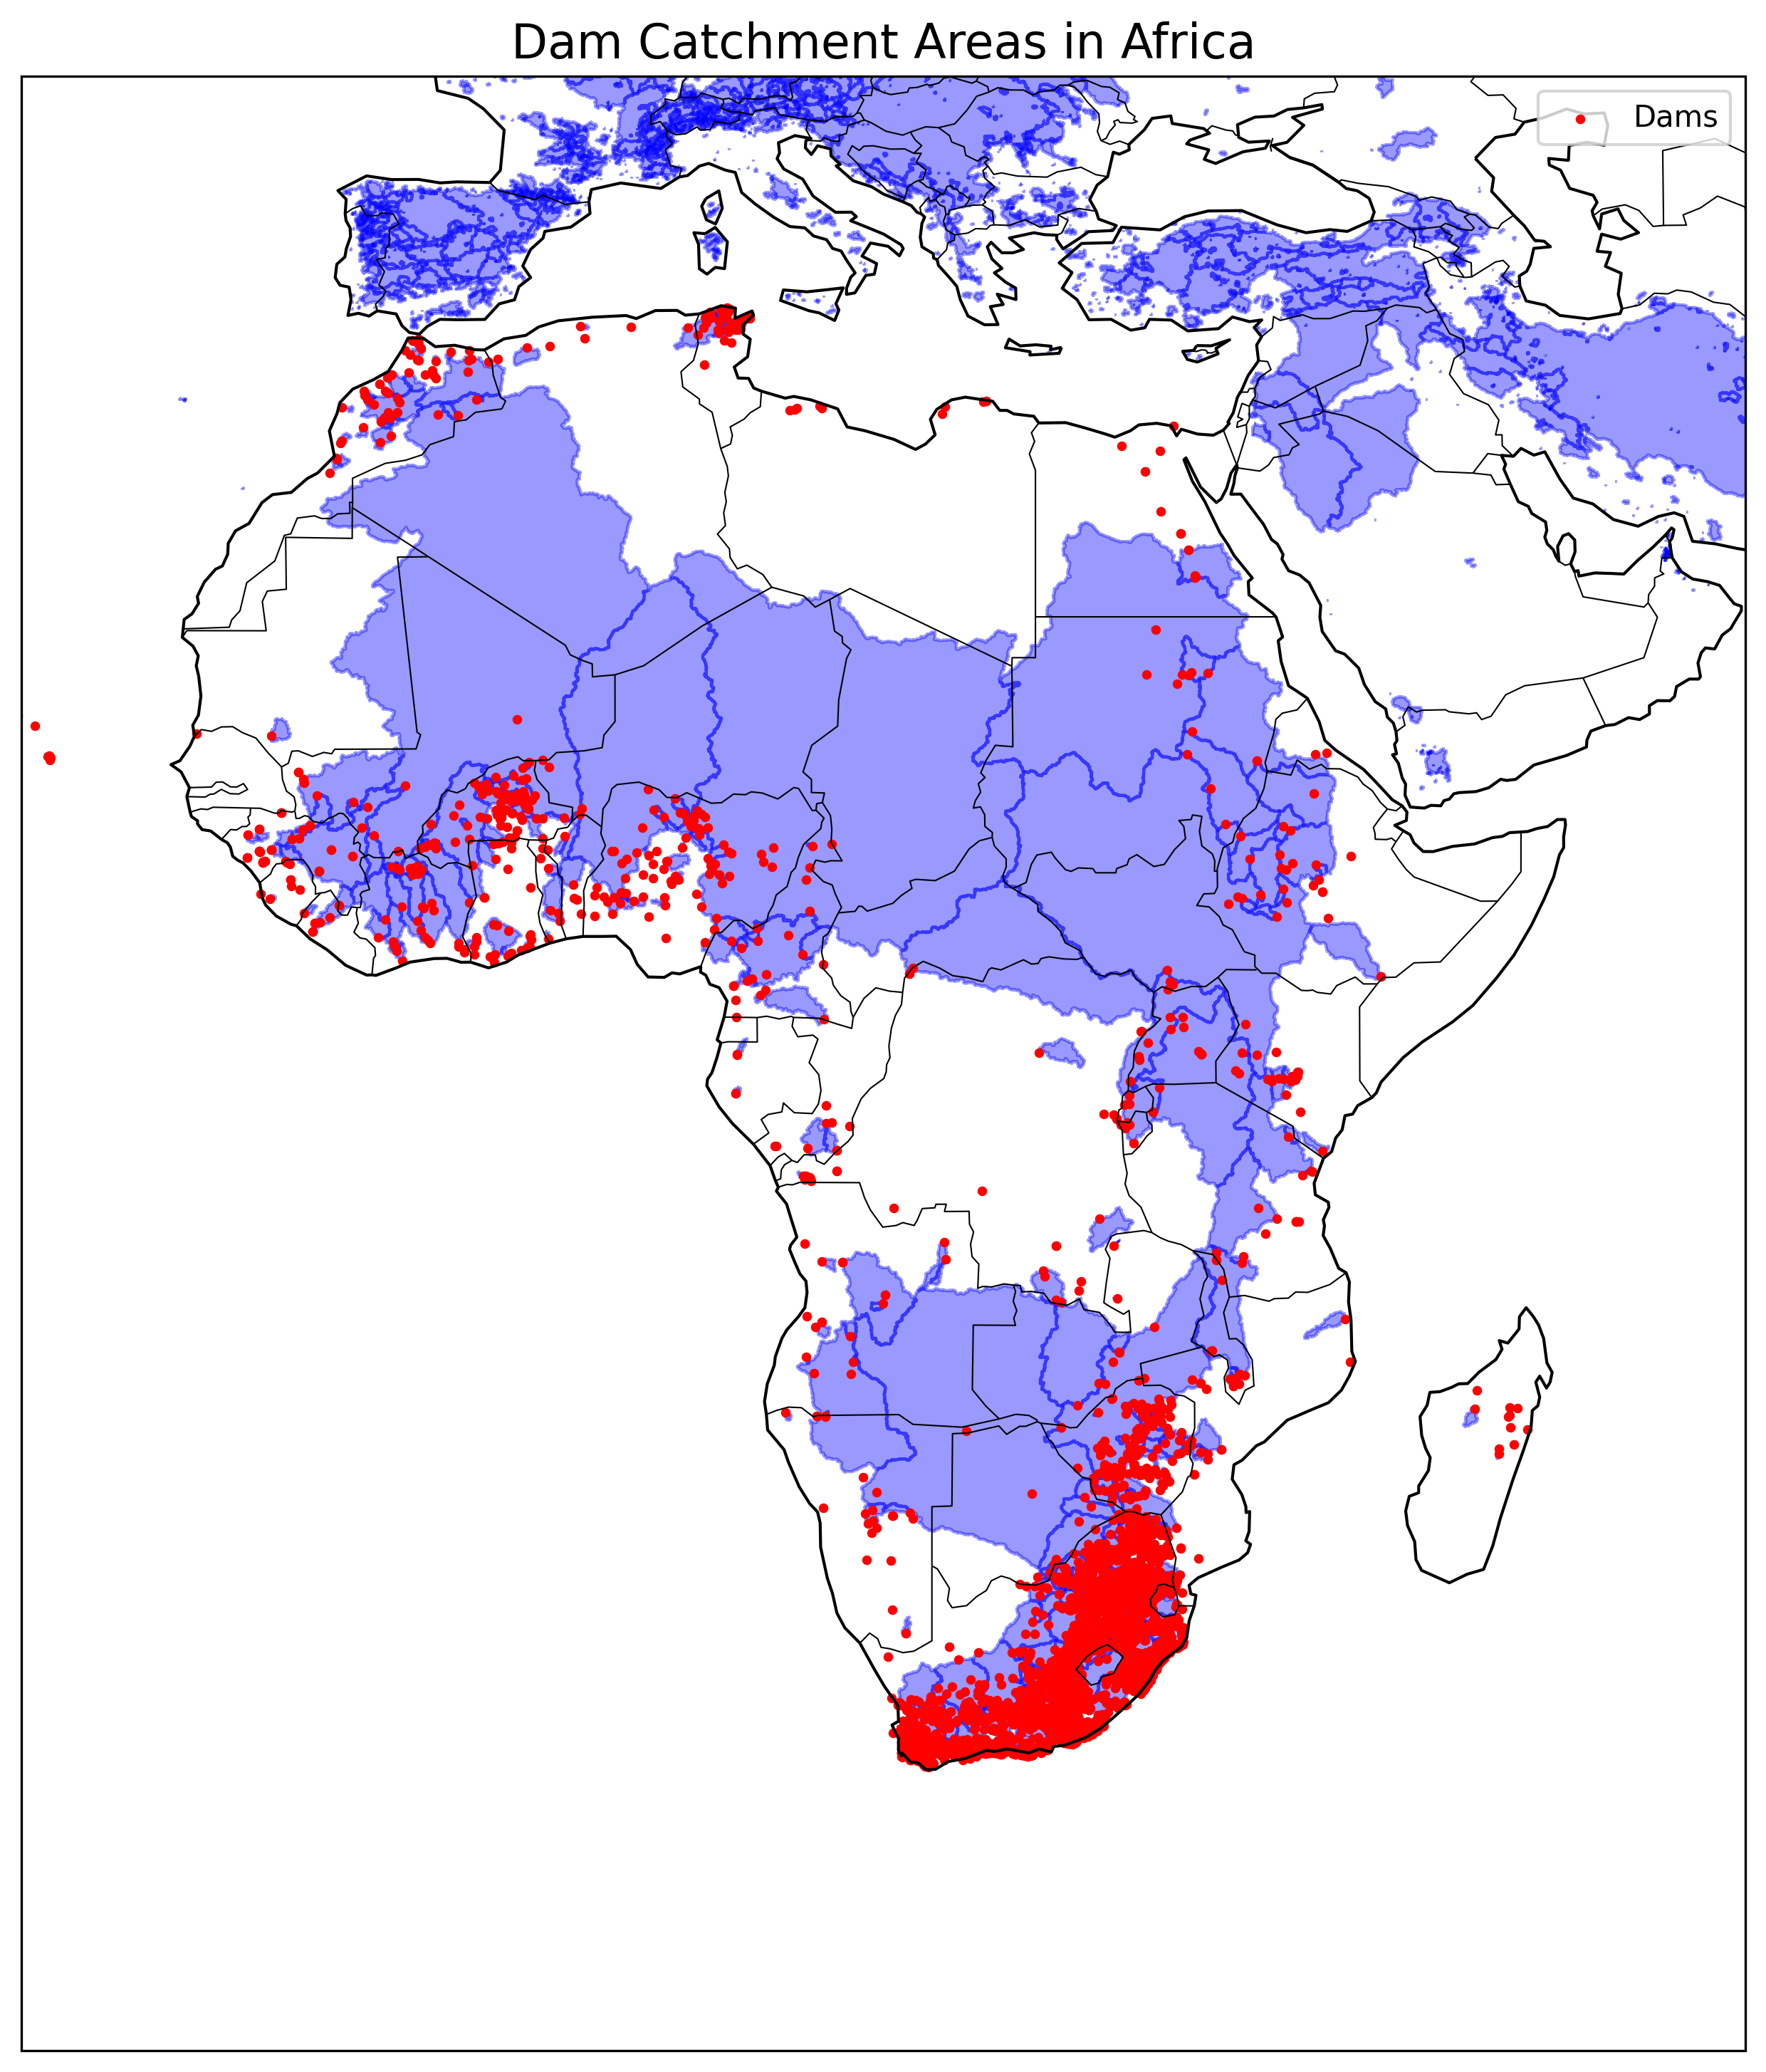

In [11]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely import wkt

# Step 1: Load the dam data and filter for Africa
df_africa = df[df['Continent'] == 'Africa']
df_africa['geometry'] = df_africa['Correct_Co'].apply(lambda x: wkt.loads(x))
gdf_coords = gpd.GeoDataFrame(df_africa, geometry='geometry')

# Step 2: Load the catchment shapefile
gdf_catchments = gpd.read_file("GDAT_v1_catchments.shp")

# Step 3: Set up the map with Cartopy
fig, ax = plt.subplots(figsize=(12, 12), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-25, 60, -40, 40])  # Full extent of Africa

# Add only the country borders and coastlines (no pixelated image)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)  # Country borders
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  # Coastlines

# Step 4: Plot the catchment areas
gdf_catchments.plot(ax=ax, facecolor='blue', alpha=0.4, edgecolor='blue', label="Catchment Areas")

# Step 5: Plot the dam locations
gdf_coords.plot(ax=ax, marker='o', color='red', markersize=5, label="Dams")

# Step 6: Add title and legend
ax.set_title("Dam Catchment Areas in Africa", fontsize=16)
plt.legend(loc="upper right", fontsize=10)

# Show the plot
plt.show()


<ipython-input-17-6a630d8f7335>:36: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right", fontsize=10)


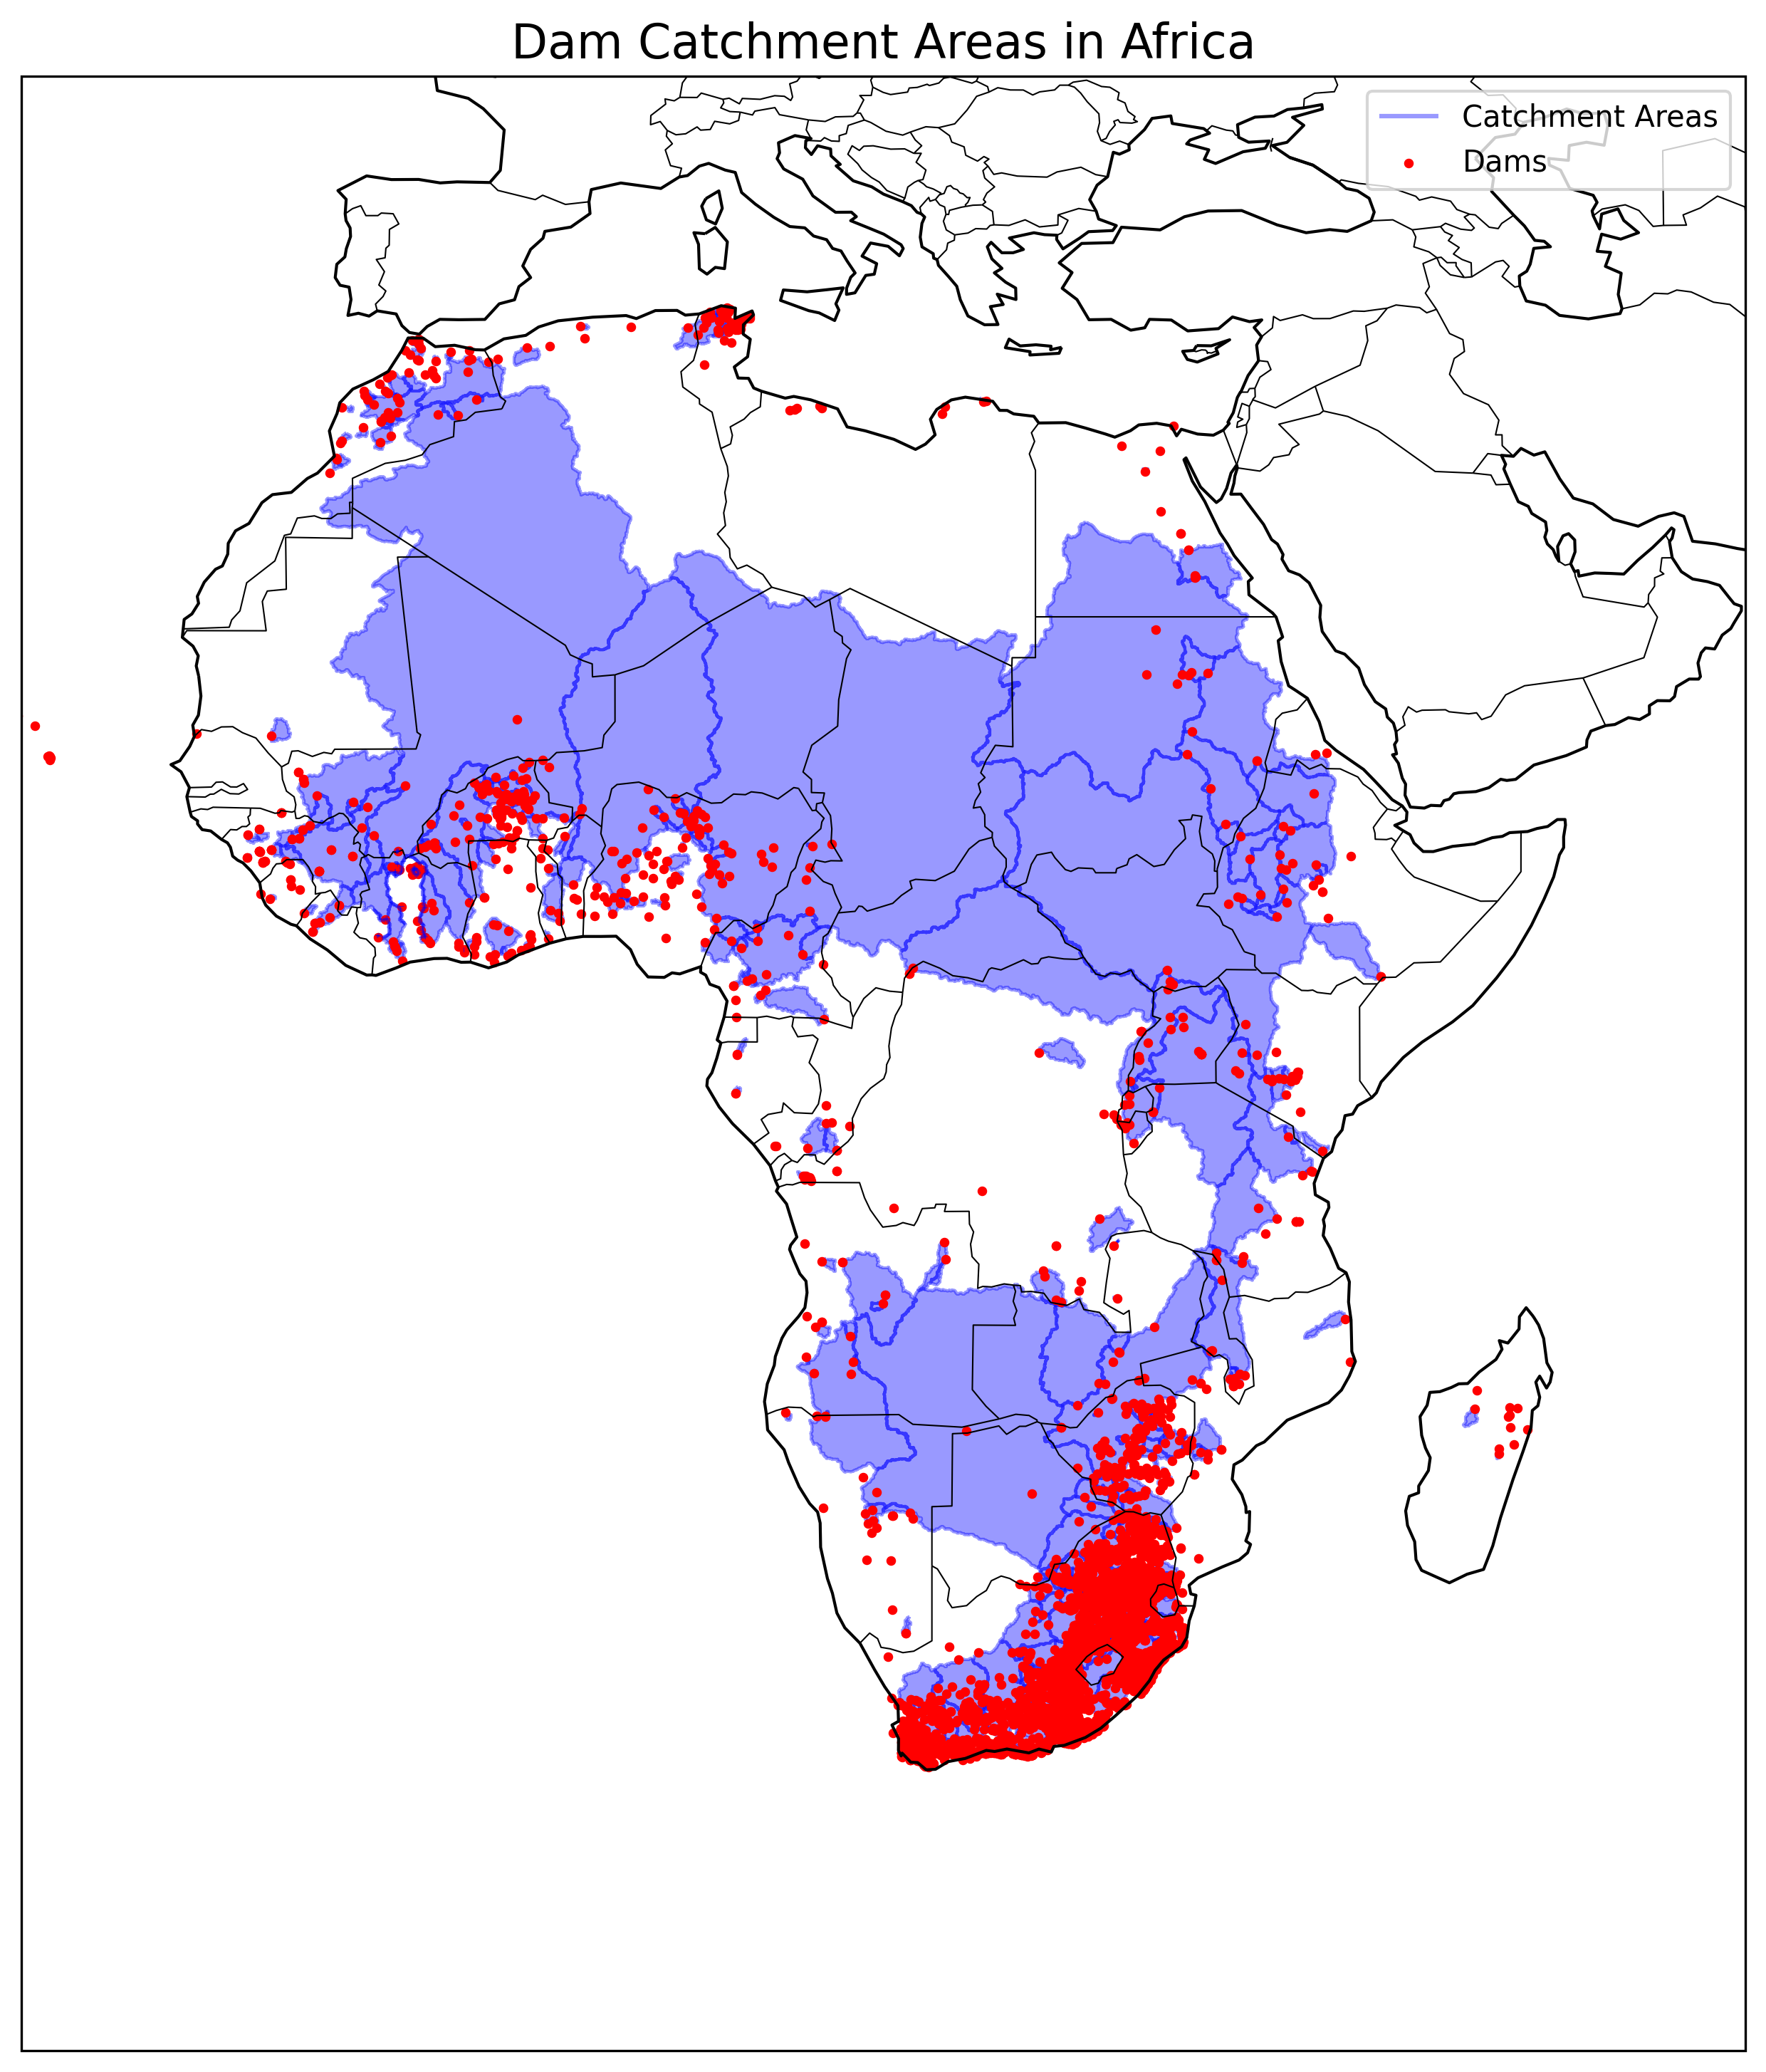

In [17]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely import wkt

# Step 1: Load the dam data and filter for Africa
df_africa = df.loc[df['Continent'] == 'Africa'].copy()  # Use .loc and .copy to avoid warnings
df_africa['geometry'] = df_africa['Correct_Co'].apply(lambda x: wkt.loads(x))
gdf_coords = gpd.GeoDataFrame(df_africa, geometry='geometry')

# Step 2: Load the catchment shapefile
gdf_catchments = gpd.read_file("GDAT_v1_catchments.shp")
africa_boundary = gdf_catchments[gdf_catchments['Continent'] == 'Africa']  # Use uppercase 'CONTINENT' field

# Step 4: Clip the catchment areas to Africa's boundaries
gdf_catchments_africa = gpd.clip(gdf_catchments, africa_boundary)

# Step 5: Set up the map with Cartopy
fig, ax = plt.subplots(figsize=(12, 12), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-25, 60, -40, 40])  # Full extent of Africa

# Add country borders and coastlines
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)  # Country borders
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  # Coastlines

# Step 6: Plot the clipped catchment areas
gdf_catchments_africa.plot(ax=ax, facecolor='blue', alpha=0.4, edgecolor='blue', label="Catchment Areas")

# Step 7: Plot the dam locations
gdf_coords.plot(ax=ax, marker='o', color='red', markersize=5, label="Dams")

# Step 8: Add title and legend
ax.set_title("Dam Catchment Areas in Africa", fontsize=16)
plt.legend(loc="upper right", fontsize=10)

# Save the figure (use fig, not plt)
output_path = "africa_dam_catchments.png"
fig.savefig(output_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [19]:
# Read the file
df_malariacases = pd.read_csv("Malaria Cases Data.csv")

# Print the first few rows of the dataframe
print(df_malariacases.head())


        IndicatorCode                          Indicator ValueType  \
0  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
1  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
2  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
3  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
4  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   

  ParentLocationCode         ParentLocation Location type SpatialDimValueCode  \
0                AMR               Americas       Country                 PRY   
1                AFR                 Africa       Country                 CAF   
2                EMR  Eastern Mediterranean       Country                 IRN   
3                AMR               Americas       Country                 BOL   
4                AFR                 Africa       Country                 BFA   

                           Location Period type  Period  ...  FactValueUoM  \
0             

In [22]:
# Clean the columns by stripping spaces
df_malariacases.columns = df_malariacases.columns.str.strip()

# Convert 'Period' to string (if necessary)
df_malariacases['Period'] = df_malariacases['Period'].astype(str)

# Filter for Africa and 2020
df_malariacasesafrica = df_malariacases[(df_malariacases['ParentLocation'] == 'Africa') & (df_malariacases['Period'] == '2020')]

# Verify the filtered data
print(df_malariacasesafrica)


          IndicatorCode                          Indicator ValueType  \
289  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
291  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
292  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
293  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
294  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
295  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
296  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
301  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
303  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
305  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
312  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
316  MALARIA_CONF_CASES  Number of confirmed malaria cases   numeric   
319  MALARIA_CONF_CASES  Number of confirmed malaria cases   num

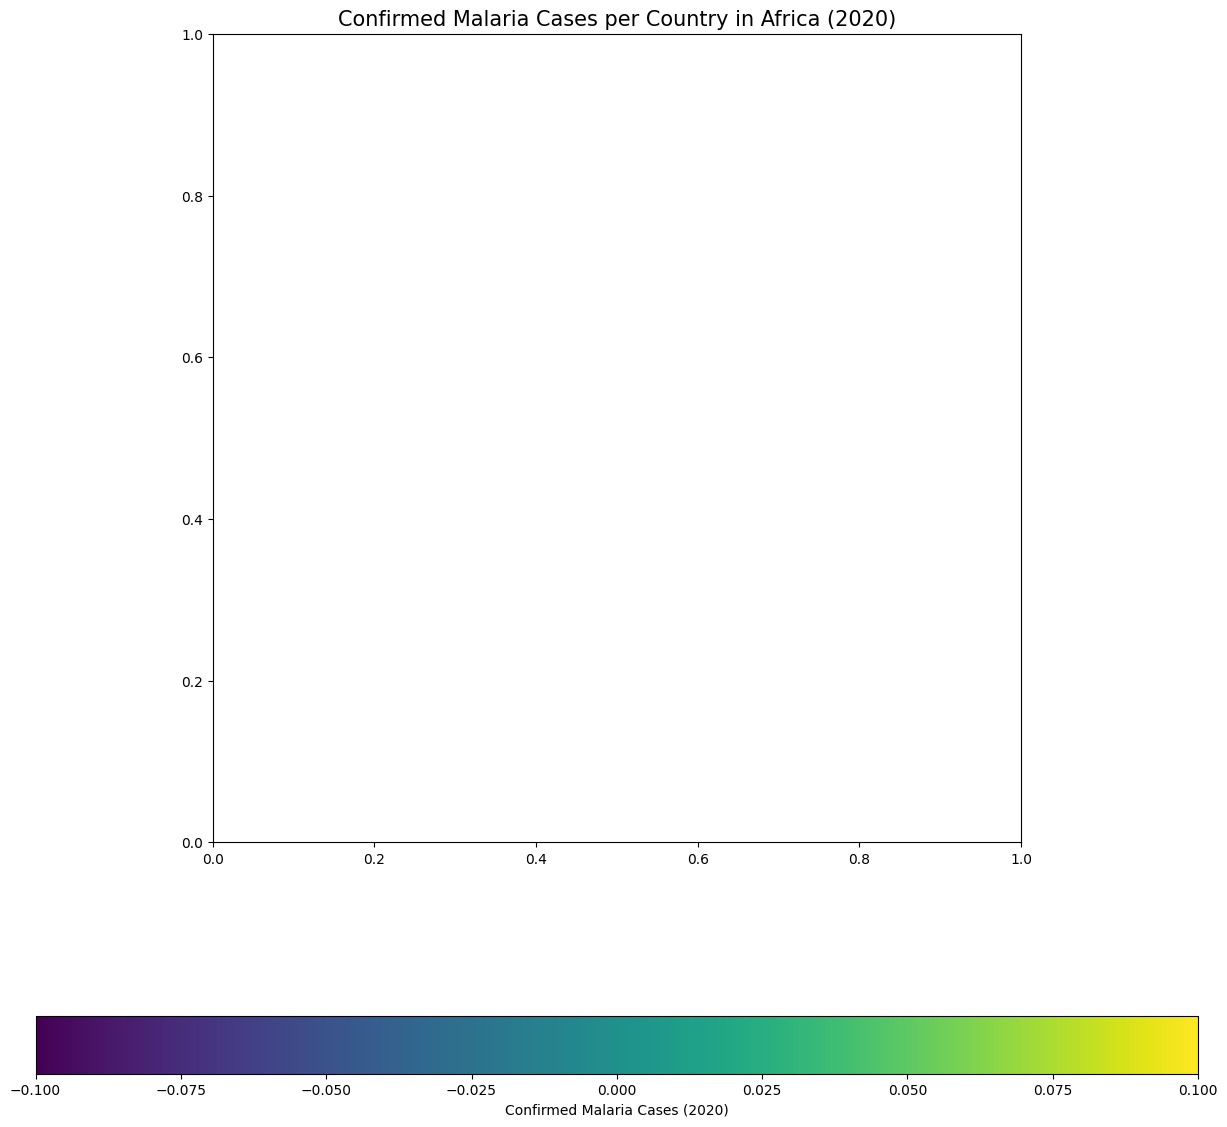

In [38]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter the malaria dataset for 2020 and Africa
df_malariacasesafrica = df_malariacases[(df_malariacases['ParentLocation'] == 'Africa') &
                                        (df_malariacases['Period'] == '2020')]

# Step 2: Load the natural earth 'countries' dataset for Africa boundaries
shapefile_path = '/content/ne_110m_admin_0_countries.shp'

# Load the shapefile
world = gpd.read_file(shapefile_path)

# Filter for African countries
africa = world[world['CONTINENT'] == 'Africa']

# Step 3: Clean the malaria data by removing commas from the number values and converting to numeric
df_malariacasesafrica['Value'] = df_malariacasesafrica['Value'].str.replace(',', '').astype(float)

# Step 4: Merge the malaria data with the geographical data based on country name
# Ensure the 'Location' column in malaria data and the 'NAME' column in shapefile match the country names
merged = africa.set_index('NAME').join(df_malariacasesafrica.set_index('Location')['Value'])

# Step 5: Plot the map with choropleth coloring
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged.plot(column='Value', ax=ax, legend=True,
            legend_kwds={'label': "Confirmed Malaria Cases (2020)", 'orientation': "horizontal"})
ax.set_title('Confirmed Malaria Cases per Country in Africa (2020)', fontsize=15)
plt.show()




In [39]:
print(df_malariacasesafrica['Location'].unique())
print(africa['NAME'].unique())

[]
['Tanzania' 'W. Sahara' 'Dem. Rep. Congo' 'Somalia' 'Kenya' 'Sudan' 'Chad'
 'South Africa' 'Lesotho' 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali'
 'Mauritania' 'Benin' 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana'
 "Côte d'Ivoire" 'Guinea' 'Guinea-Bissau' 'Liberia' 'Sierra Leone'
 'Burkina Faso' 'Central African Rep.' 'Congo' 'Gabon' 'Eq. Guinea'
 'Zambia' 'Malawi' 'Mozambique' 'eSwatini' 'Angola' 'Burundi' 'Madagascar'
 'Gambia' 'Tunisia' 'Algeria' 'Eritrea' 'Morocco' 'Egypt' 'Libya'
 'Ethiopia' 'Djibouti' 'Somaliland' 'Uganda' 'Rwanda' 'S. Sudan']
